In [1]:
import numpy as np
import pandas as pd
import utils
from nn import NeuralNetwork
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
def evaluate_classification_metrics(y_true, y_pred, multiclass=False):

    average_type = 'macro' if multiclass else 'binary'

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average_type, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average_type, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average_type, zero_division=0)

    print(f"✅ Accuracy : {acc:.4f}")
    print(f"✅ Precision: {prec:.4f}")
    print(f"✅ Recall   : {rec:.4f}")
    print(f"✅ F1 Score : {f1:.4f}")

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1
    }


In [3]:

train_data = pd.read_csv(
    'data/data.csv'
)

train_data.rename(columns={
    "diagnosis": "class",
    "id": "ID"
}, inplace=True)

train_data = train_data.drop(["Unnamed: 32"],axis=1)

le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'].values.ravel())

X = train_data.drop(columns=["ID", "class"])
y = train_data["class"].astype(int)  

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/validation split (since test_data has no labels for now)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [4]:
configs = [
    # Simple
    {"layers": [30, 1], "act": [utils.sigmoid], "lr": 0.01},
    {"layers": [30, 1], "act": [utils.sigmoid], "lr": 0.1},
    {"layers": [30, 1], "act": [utils.sigmoid], "lr": 1},


    # 1 hidden layer
    {"layers": [30, 16, 1], "act": [utils.relu, utils.sigmoid], "lr": 0.01},
    {"layers": [30, 16, 1], "act": [utils.tanh, utils.sigmoid], "lr": 0.01},
    {"layers": [30, 16, 1], "act": [utils.relu, utils.sigmoid], "lr": 0.1},
    {"layers": [30, 16, 1], "act": [utils.tanh, utils.sigmoid], "lr": 0.1},
    {"layers": [30, 16, 1], "act": [utils.relu, utils.sigmoid], "lr": 1},

    # 2 hidden layers
    {"layers": [30, 16, 8, 1], "act": [utils.relu, utils.relu, utils.sigmoid], "lr": 0.01},
    {"layers": [30, 16, 8, 1], "act": [utils.tanh, utils.relu, utils.sigmoid], "lr": 0.01},
    {"layers": [30, 16, 8, 1], "act": [utils.tanh, utils.tanh, utils.sigmoid], "lr": 0.01},
    {"layers": [30, 16, 8, 1], "act": [utils.relu, utils.relu, utils.sigmoid], "lr": 0.1},
    {"layers": [30, 16, 8, 1], "act": [utils.tanh, utils.relu, utils.sigmoid], "lr": 0.1},
    {"layers": [30, 16, 8, 1], "act": [utils.tanh, utils.tanh, utils.sigmoid], "lr": 0.1},
    {"layers": [30, 16, 8, 1], "act": [utils.relu, utils.relu, utils.sigmoid], "lr": 1},

]


In [7]:
results = []

for i, cfg in enumerate(configs):
    print(f"\n🔁 Running config {i+1}/{len(configs)}")
    print(f"Layers: {cfg['layers']}, Activations: {[fn.__name__ for fn in cfg['act']]}, LR: {cfg['lr']}")

    nn = NeuralNetwork(cfg["layers"], cfg["act"], learning_rate=cfg["lr"])
    nn.train(X_train, y_train.values, epochs=100,X_val=X_val,y_val=y_val.values)

    preds = nn.predict(X_val)
    metrics = evaluate_classification_metrics(y_val.values, preds)

    train_loss = nn.history["train_loss"][-1]
    val_loss = nn.history["val_loss"][-1] if nn.history["val_loss"] else None
    train_acc = nn.history["train_acc"][-1]
    val_acc = nn.history["val_acc"][-1] if nn.history["val_acc"] else None

    total_params, total_bytes = nn.model_size(verbose=False)


    results.append({
        "config_id": i + 1,
        "layers": cfg["layers"],
        "activations": [fn.__name__ for fn in cfg["act"]],
        "learning_rate": cfg["lr"],

        # Add train history
        "train_loss": float(train_loss),
        "val_loss": float(val_loss) if val_loss is not None else None,
        "train_acc": float(train_acc),
        "val_acc": float(val_acc) if val_acc is not None else None,

        **metrics,

        "num_parameters": total_params,
        "ram_bytes": total_bytes,
        })


🔁 Running config 1/15
Layers: [30, 1], Activations: ['sigmoid'], LR: 0.01
Epoch 1/100, Loss: 0.8124, Acc: 0.7560, Val Loss: 0.1627, Val Acc: 0.9298
Epoch 2/100, Loss: 0.2453, Acc: 0.9429, Val Loss: 0.1115, Val Acc: 0.9561
Epoch 3/100, Loss: 0.1942, Acc: 0.9495, Val Loss: 0.0959, Val Acc: 0.9561
Epoch 4/100, Loss: 0.1642, Acc: 0.9604, Val Loss: 0.0886, Val Acc: 0.9561
Epoch 5/100, Loss: 0.1431, Acc: 0.9670, Val Loss: 0.0844, Val Acc: 0.9649
Epoch 6/100, Loss: 0.1270, Acc: 0.9714, Val Loss: 0.0817, Val Acc: 0.9649
Epoch 7/100, Loss: 0.1144, Acc: 0.9692, Val Loss: 0.0796, Val Acc: 0.9649
Epoch 8/100, Loss: 0.1044, Acc: 0.9736, Val Loss: 0.0780, Val Acc: 0.9649
Epoch 9/100, Loss: 0.0962, Acc: 0.9736, Val Loss: 0.0767, Val Acc: 0.9737
Epoch 10/100, Loss: 0.0894, Acc: 0.9758, Val Loss: 0.0755, Val Acc: 0.9737
Epoch 11/100, Loss: 0.0842, Acc: 0.9736, Val Loss: 0.0746, Val Acc: 0.9737
Epoch 12/100, Loss: 0.0798, Acc: 0.9758, Val Loss: 0.0739, Val Acc: 0.9737
Epoch 13/100, Loss: 0.0761, Acc: 0

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 6/100, Loss: 0.0665, Acc: 0.9758, Val Loss: 0.0619, Val Acc: 0.9737
Epoch 7/100, Loss: 0.0654, Acc: 0.9758, Val Loss: 0.0621, Val Acc: 0.9737
Epoch 8/100, Loss: 0.0641, Acc: 0.9758, Val Loss: 0.0631, Val Acc: 0.9737
Epoch 9/100, Loss: 0.0633, Acc: 0.9780, Val Loss: 0.0633, Val Acc: 0.9737
Epoch 10/100, Loss: 0.0623, Acc: 0.9780, Val Loss: 0.0642, Val Acc: 0.9737
Epoch 11/100, Loss: 0.0617, Acc: 0.9802, Val Loss: 0.0643, Val Acc: 0.9737
Epoch 12/100, Loss: 0.0609, Acc: 0.9780, Val Loss: 0.0652, Val Acc: 0.9737
Epoch 13/100, Loss: 0.0604, Acc: 0.9802, Val Loss: 0.0654, Val Acc: 0.9737
Epoch 14/100, Loss: 0.0597, Acc: 0.9802, Val Loss: 0.0661, Val Acc: 0.9737
Epoch 15/100, Loss: 0.0592, Acc: 0.9802, Val Loss: 0.0664, Val Acc: 0.9737
Epoch 16/100, Loss: 0.0586, Acc: 0.9802, Val Loss: 0.0670, Val Acc: 0.9737
Epoch 17/100, Loss: 0.0581, Acc: 0.9802, Val Loss: 0.0674, Val Acc: 0.9737
Epoch 18/100, Loss: 0.0576, Acc: 0.9802, Val Loss: 0.0679, Val Acc: 0.9737
Epoch 19/100, Loss: 0.0572, A

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 6/100, Loss: 0.3696, Acc: 0.9604, Val Loss: 0.2726, Val Acc: 0.9737
Epoch 7/100, Loss: 0.1945, Acc: 0.9758, Val Loss: 0.2754, Val Acc: 0.9737
Epoch 8/100, Loss: 0.2036, Acc: 0.9692, Val Loss: 0.3145, Val Acc: 0.9737
Epoch 9/100, Loss: 0.1672, Acc: 0.9758, Val Loss: 0.1974, Val Acc: 0.9825
Epoch 10/100, Loss: 0.1938, Acc: 0.9780, Val Loss: 0.6192, Val Acc: 0.9649
Epoch 11/100, Loss: 0.2668, Acc: 0.9714, Val Loss: 0.1990, Val Acc: 0.9825
Epoch 12/100, Loss: 0.2406, Acc: 0.9692, Val Loss: 0.5629, Val Acc: 0.9649
Epoch 13/100, Loss: 0.3488, Acc: 0.9736, Val Loss: 0.3408, Val Acc: 0.9561
Epoch 14/100, Loss: 0.2386, Acc: 0.9670, Val Loss: 0.2543, Val Acc: 0.9825
Epoch 15/100, Loss: 0.1931, Acc: 0.9802, Val Loss: 0.6406, Val Acc: 0.9649
Epoch 16/100, Loss: 0.2664, Acc: 0.9714, Val Loss: 0.3755, Val Acc: 0.9737
Epoch 17/100, Loss: 0.1745, Acc: 0.9758, Val Loss: 0.2966, Val Acc: 0.9737
Epoch 18/100, Loss: 0.1674, Acc: 0.9846, Val Loss: 0.3059, Val Acc: 0.9737
Epoch 19/100, Loss: 0.2386, A

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 4/100, Loss: 0.0933, Acc: 0.9846, Val Loss: 0.2695, Val Acc: 0.9298
Epoch 5/100, Loss: 0.0791, Acc: 0.9846, Val Loss: 0.2503, Val Acc: 0.9298
Epoch 6/100, Loss: 0.0727, Acc: 0.9846, Val Loss: 0.2326, Val Acc: 0.9386
Epoch 7/100, Loss: 0.0675, Acc: 0.9846, Val Loss: 0.2184, Val Acc: 0.9474
Epoch 8/100, Loss: 0.0628, Acc: 0.9846, Val Loss: 0.2066, Val Acc: 0.9474
Epoch 9/100, Loss: 0.0585, Acc: 0.9846, Val Loss: 0.1972, Val Acc: 0.9561
Epoch 10/100, Loss: 0.0545, Acc: 0.9846, Val Loss: 0.1892, Val Acc: 0.9561
Epoch 11/100, Loss: 0.0508, Acc: 0.9846, Val Loss: 0.1834, Val Acc: 0.9561
Epoch 12/100, Loss: 0.0472, Acc: 0.9868, Val Loss: 0.1794, Val Acc: 0.9561
Epoch 13/100, Loss: 0.0437, Acc: 0.9868, Val Loss: 0.1762, Val Acc: 0.9561
Epoch 14/100, Loss: 0.0400, Acc: 0.9868, Val Loss: 0.1759, Val Acc: 0.9561
Epoch 15/100, Loss: 0.0376, Acc: 0.9868, Val Loss: 0.1766, Val Acc: 0.9474
Epoch 16/100, Loss: 0.0345, Acc: 0.9868, Val Loss: 0.1795, Val Acc: 0.9474
Epoch 17/100, Loss: 0.0314, Acc

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 2/100, Loss: 0.1596, Acc: 0.9385, Val Loss: 0.1780, Val Acc: 0.9211
Epoch 3/100, Loss: 0.1235, Acc: 0.9538, Val Loss: 0.1606, Val Acc: 0.9211
Epoch 4/100, Loss: 0.1045, Acc: 0.9582, Val Loss: 0.1496, Val Acc: 0.9298
Epoch 5/100, Loss: 0.0917, Acc: 0.9626, Val Loss: 0.1424, Val Acc: 0.9386
Epoch 6/100, Loss: 0.0823, Acc: 0.9626, Val Loss: 0.1376, Val Acc: 0.9386
Epoch 7/100, Loss: 0.0752, Acc: 0.9714, Val Loss: 0.1344, Val Acc: 0.9386
Epoch 8/100, Loss: 0.0695, Acc: 0.9758, Val Loss: 0.1321, Val Acc: 0.9474
Epoch 9/100, Loss: 0.0649, Acc: 0.9780, Val Loss: 0.1303, Val Acc: 0.9474
Epoch 10/100, Loss: 0.0610, Acc: 0.9802, Val Loss: 0.1290, Val Acc: 0.9474
Epoch 11/100, Loss: 0.0576, Acc: 0.9868, Val Loss: 0.1280, Val Acc: 0.9474
Epoch 12/100, Loss: 0.0546, Acc: 0.9868, Val Loss: 0.1273, Val Acc: 0.9474
Epoch 13/100, Loss: 0.0519, Acc: 0.9868, Val Loss: 0.1268, Val Acc: 0.9474
Epoch 14/100, Loss: 0.0494, Acc: 0.9868, Val Loss: 0.1265, Val Acc: 0.9561
Epoch 15/100, Loss: 0.0472, Acc: 

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 2/100, Loss: 0.3694, Acc: 0.9538, Val Loss: 0.2576, Val Acc: 0.9737
Epoch 3/100, Loss: 0.1288, Acc: 0.9780, Val Loss: 0.2441, Val Acc: 0.9649
Epoch 4/100, Loss: 0.0510, Acc: 0.9934, Val Loss: 0.1926, Val Acc: 0.9737
Epoch 5/100, Loss: 0.0341, Acc: 0.9934, Val Loss: 0.1644, Val Acc: 0.9737
Epoch 6/100, Loss: 0.0229, Acc: 0.9956, Val Loss: 0.1537, Val Acc: 0.9737
Epoch 7/100, Loss: 0.0152, Acc: 0.9956, Val Loss: 0.1527, Val Acc: 0.9737
Epoch 8/100, Loss: 0.0107, Acc: 0.9956, Val Loss: 0.1522, Val Acc: 0.9737
Epoch 9/100, Loss: 0.0063, Acc: 0.9978, Val Loss: 0.1560, Val Acc: 0.9737
Epoch 10/100, Loss: 0.0049, Acc: 1.0000, Val Loss: 0.1587, Val Acc: 0.9737
Epoch 11/100, Loss: 0.0037, Acc: 1.0000, Val Loss: 0.1614, Val Acc: 0.9737
Epoch 12/100, Loss: 0.0029, Acc: 1.0000, Val Loss: 0.1617, Val Acc: 0.9737
Epoch 13/100, Loss: 0.0023, Acc: 1.0000, Val Loss: 0.1639, Val Acc: 0.9825
Epoch 14/100, Loss: 0.0020, Acc: 1.0000, Val Loss: 0.1639, Val Acc: 0.9825
Epoch 15/100, Loss: 0.0017, Acc: 

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 2/100, Loss: 0.0803, Acc: 0.9714, Val Loss: 0.0753, Val Acc: 0.9649
Epoch 3/100, Loss: 0.0574, Acc: 0.9802, Val Loss: 0.0907, Val Acc: 0.9737
Epoch 4/100, Loss: 0.0470, Acc: 0.9890, Val Loss: 0.1034, Val Acc: 0.9649
Epoch 5/100, Loss: 0.0432, Acc: 0.9890, Val Loss: 0.1108, Val Acc: 0.9649
Epoch 6/100, Loss: 0.0380, Acc: 0.9912, Val Loss: 0.1162, Val Acc: 0.9561
Epoch 7/100, Loss: 0.0333, Acc: 0.9934, Val Loss: 0.1225, Val Acc: 0.9561
Epoch 8/100, Loss: 0.0289, Acc: 0.9956, Val Loss: 0.1294, Val Acc: 0.9649
Epoch 9/100, Loss: 0.0251, Acc: 0.9956, Val Loss: 0.1359, Val Acc: 0.9649
Epoch 10/100, Loss: 0.0219, Acc: 0.9956, Val Loss: 0.1405, Val Acc: 0.9649
Epoch 11/100, Loss: 0.0192, Acc: 0.9956, Val Loss: 0.1433, Val Acc: 0.9649
Epoch 12/100, Loss: 0.0170, Acc: 0.9978, Val Loss: 0.1451, Val Acc: 0.9737
Epoch 13/100, Loss: 0.0151, Acc: 0.9978, Val Loss: 0.1462, Val Acc: 0.9737
Epoch 14/100, Loss: 0.0135, Acc: 0.9978, Val Loss: 0.1468, Val Acc: 0.9737
Epoch 15/100, Loss: 0.0121, Acc: 

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),
c:\Users\1\Documents\Uni\Master\ML\Ex2\nn_scratch\utils.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 3/100, Loss: 5.1094, Acc: 0.8110, Val Loss: 2.4238, Val Acc: 0.9123
Epoch 4/100, Loss: 8.4756, Acc: 0.6747, Val Loss: 9.9339, Val Acc: 0.6228
Epoch 5/100, Loss: 6.7754, Acc: 0.7407, Val Loss: 2.0590, Val Acc: 0.7895
Epoch 6/100, Loss: 6.0395, Acc: 0.7451, Val Loss: 3.8846, Val Acc: 0.8509
Epoch 7/100, Loss: nan, Acc: 0.6923, Val Loss: nan, Val Acc: 0.6228
Epoch 8/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 9/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 10/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 11/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 12/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 13/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 14/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 15/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 16/100, Loss: nan, Acc: 0.6286, Val Loss: nan, Val Acc: 0.6228
Epoch 17/100, Los

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 2/100, Loss: 0.1792, Acc: 0.9604, Val Loss: 0.1357, Val Acc: 0.9561
Epoch 3/100, Loss: 0.1216, Acc: 0.9736, Val Loss: 0.1518, Val Acc: 0.9474
Epoch 4/100, Loss: 0.1268, Acc: 0.9670, Val Loss: 0.1028, Val Acc: 0.9561
Epoch 5/100, Loss: 0.0992, Acc: 0.9758, Val Loss: 0.1238, Val Acc: 0.9649
Epoch 6/100, Loss: 0.0839, Acc: 0.9780, Val Loss: 0.1189, Val Acc: 0.9649
Epoch 7/100, Loss: 0.0700, Acc: 0.9824, Val Loss: 0.1202, Val Acc: 0.9649
Epoch 8/100, Loss: 0.0602, Acc: 0.9846, Val Loss: 0.1286, Val Acc: 0.9737
Epoch 9/100, Loss: 0.0580, Acc: 0.9846, Val Loss: 0.1278, Val Acc: 0.9737
Epoch 10/100, Loss: 0.0504, Acc: 0.9868, Val Loss: 0.1438, Val Acc: 0.9737
Epoch 11/100, Loss: 0.0473, Acc: 0.9868, Val Loss: 0.1364, Val Acc: 0.9737
Epoch 12/100, Loss: 0.0425, Acc: 0.9890, Val Loss: 0.1462, Val Acc: 0.9737
Epoch 13/100, Loss: 0.0381, Acc: 0.9912, Val Loss: 0.1532, Val Acc: 0.9737
Epoch 14/100, Loss: 0.0352, Acc: 0.9912, Val Loss: 0.1561, Val Acc: 0.9737
Epoch 15/100, Loss: 0.0328, Acc: 

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 4/100, Loss: 0.1182, Acc: 0.9560, Val Loss: 0.1334, Val Acc: 0.9561
Epoch 5/100, Loss: 0.1020, Acc: 0.9626, Val Loss: 0.1258, Val Acc: 0.9561
Epoch 6/100, Loss: 0.0893, Acc: 0.9692, Val Loss: 0.1219, Val Acc: 0.9561
Epoch 7/100, Loss: 0.0795, Acc: 0.9714, Val Loss: 0.1194, Val Acc: 0.9561
Epoch 8/100, Loss: 0.0701, Acc: 0.9780, Val Loss: 0.1201, Val Acc: 0.9561
Epoch 9/100, Loss: 0.0629, Acc: 0.9780, Val Loss: 0.1203, Val Acc: 0.9474
Epoch 10/100, Loss: 0.0574, Acc: 0.9802, Val Loss: 0.1201, Val Acc: 0.9474
Epoch 11/100, Loss: 0.0522, Acc: 0.9868, Val Loss: 0.1201, Val Acc: 0.9561
Epoch 12/100, Loss: 0.0480, Acc: 0.9890, Val Loss: 0.1206, Val Acc: 0.9561
Epoch 13/100, Loss: 0.0443, Acc: 0.9912, Val Loss: 0.1202, Val Acc: 0.9561
Epoch 14/100, Loss: 0.0410, Acc: 0.9912, Val Loss: 0.1186, Val Acc: 0.9561
Epoch 15/100, Loss: 0.0382, Acc: 0.9912, Val Loss: 0.1184, Val Acc: 0.9649
Epoch 16/100, Loss: 0.0357, Acc: 0.9934, Val Loss: 0.1187, Val Acc: 0.9649
Epoch 17/100, Loss: 0.0335, Acc

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 3/100, Loss: 0.1891, Acc: 0.9429, Val Loss: 0.1817, Val Acc: 0.9386
Epoch 4/100, Loss: 0.1577, Acc: 0.9495, Val Loss: 0.1678, Val Acc: 0.9386
Epoch 5/100, Loss: 0.1306, Acc: 0.9560, Val Loss: 0.1576, Val Acc: 0.9386
Epoch 6/100, Loss: 0.1050, Acc: 0.9670, Val Loss: 0.1524, Val Acc: 0.9386
Epoch 7/100, Loss: 0.0915, Acc: 0.9714, Val Loss: 0.1495, Val Acc: 0.9474
Epoch 8/100, Loss: 0.0834, Acc: 0.9736, Val Loss: 0.1474, Val Acc: 0.9474
Epoch 9/100, Loss: 0.0776, Acc: 0.9780, Val Loss: 0.1458, Val Acc: 0.9474
Epoch 10/100, Loss: 0.0734, Acc: 0.9780, Val Loss: 0.1452, Val Acc: 0.9474
Epoch 11/100, Loss: 0.0701, Acc: 0.9802, Val Loss: 0.1451, Val Acc: 0.9561
Epoch 12/100, Loss: 0.0675, Acc: 0.9802, Val Loss: 0.1455, Val Acc: 0.9561
Epoch 13/100, Loss: 0.0653, Acc: 0.9802, Val Loss: 0.1462, Val Acc: 0.9561
Epoch 14/100, Loss: 0.0633, Acc: 0.9802, Val Loss: 0.1473, Val Acc: 0.9561
Epoch 15/100, Loss: 0.0614, Acc: 0.9802, Val Loss: 0.1488, Val Acc: 0.9561
Epoch 16/100, Loss: 0.0594, Acc:

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),
c:\Users\1\Documents\Uni\Master\ML\Ex2\nn_scratch\utils.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/100, Loss: 1.2501, Acc: 0.6396, Val Loss: 0.6550, Val Acc: 0.6316
Epoch 2/100, Loss: 0.6490, Acc: 0.6505, Val Loss: 0.6463, Val Acc: 0.6404
Epoch 3/100, Loss: 0.6457, Acc: 0.6440, Val Loss: 0.6565, Val Acc: 0.6316
Epoch 4/100, Loss: 0.6455, Acc: 0.6440, Val Loss: 0.6564, Val Acc: 0.6316
Epoch 5/100, Loss: 0.6455, Acc: 0.6440, Val Loss: 0.6563, Val Acc: 0.6316
Epoch 6/100, Loss: 0.6455, Acc: 0.6440, Val Loss: 0.6562, Val Acc: 0.6316
Epoch 7/100, Loss: 0.6430, Acc: 0.6462, Val Loss: 0.5754, Val Acc: 0.7105
Epoch 8/100, Loss: 0.6032, Acc: 0.6857, Val Loss: 0.5811, Val Acc: 0.7018
Epoch 9/100, Loss: 0.6009, Acc: 0.6879, Val Loss: 0.5807, Val Acc: 0.7018
Epoch 10/100, Loss: 0.7020, Acc: 0.7033, Val Loss: 0.6668, Val Acc: 0.6228
Epoch 11/100, Loss: 0.6658, Acc: 0.6264, Val Loss: 0.6629, Val Acc: 0.6228
Epoch 12/100, Loss: 0.6658, Acc: 0.6264, Val Loss: 0.6629, Val Acc: 0.6228
Epoch 13/100, Loss: 0.6658, Acc: 0.6264, Val Loss: 0.6629, Val Acc: 0.6228
Epoch 14/100, Loss: 0.6658, Acc: 0

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 2/100, Loss: 0.0960, Acc: 0.9648, Val Loss: 0.1084, Val Acc: 0.9737
Epoch 3/100, Loss: 0.0652, Acc: 0.9824, Val Loss: 0.0924, Val Acc: 0.9825
Epoch 4/100, Loss: 0.0423, Acc: 0.9824, Val Loss: 0.0873, Val Acc: 0.9825
Epoch 5/100, Loss: 0.0300, Acc: 0.9868, Val Loss: 0.0887, Val Acc: 0.9737
Epoch 6/100, Loss: 0.0256, Acc: 0.9890, Val Loss: 0.0941, Val Acc: 0.9825
Epoch 7/100, Loss: 0.0179, Acc: 0.9956, Val Loss: 0.0981, Val Acc: 0.9825
Epoch 8/100, Loss: 0.0157, Acc: 0.9890, Val Loss: 0.1050, Val Acc: 0.9825
Epoch 9/100, Loss: 0.0273, Acc: 0.9868, Val Loss: 0.0916, Val Acc: 0.9825
Epoch 10/100, Loss: 0.0162, Acc: 0.9912, Val Loss: 0.0905, Val Acc: 0.9912
Epoch 11/100, Loss: 0.0067, Acc: 1.0000, Val Loss: 0.0858, Val Acc: 0.9912
Epoch 12/100, Loss: 0.0040, Acc: 1.0000, Val Loss: 0.0961, Val Acc: 0.9912
Epoch 13/100, Loss: 0.0029, Acc: 1.0000, Val Loss: 0.0996, Val Acc: 0.9912
Epoch 14/100, Loss: 0.0018, Acc: 1.0000, Val Loss: 0.1021, Val Acc: 0.9912
Epoch 15/100, Loss: 0.0014, Acc: 

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


Epoch 1/100, Loss: 0.1698, Acc: 0.9275, Val Loss: 0.0776, Val Acc: 0.9649
Epoch 2/100, Loss: 0.0722, Acc: 0.9802, Val Loss: 0.1047, Val Acc: 0.9649
Epoch 3/100, Loss: 0.0805, Acc: 0.9758, Val Loss: 0.0627, Val Acc: 0.9649
Epoch 4/100, Loss: 0.0867, Acc: 0.9692, Val Loss: 0.1203, Val Acc: 0.9474
Epoch 5/100, Loss: 0.0574, Acc: 0.9824, Val Loss: 0.1258, Val Acc: 0.9474
Epoch 6/100, Loss: 0.0641, Acc: 0.9802, Val Loss: 0.1125, Val Acc: 0.9561
Epoch 7/100, Loss: 0.0373, Acc: 0.9912, Val Loss: 0.1308, Val Acc: 0.9386
Epoch 8/100, Loss: 0.0423, Acc: 0.9890, Val Loss: 0.1144, Val Acc: 0.9561
Epoch 9/100, Loss: 0.0235, Acc: 0.9956, Val Loss: 0.1208, Val Acc: 0.9561
Epoch 10/100, Loss: 0.0199, Acc: 0.9956, Val Loss: 0.1249, Val Acc: 0.9561
Epoch 11/100, Loss: 0.0183, Acc: 0.9956, Val Loss: 0.1274, Val Acc: 0.9561
Epoch 12/100, Loss: 0.0171, Acc: 0.9956, Val Loss: 0.1293, Val Acc: 0.9649
Epoch 13/100, Loss: 0.0161, Acc: 0.9956, Val Loss: 0.1307, Val Acc: 0.9649
Epoch 14/100, Loss: 0.0152, Acc: 0

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),
c:\Users\1\Documents\Uni\Master\ML\Ex2\nn_scratch\utils.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 3/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 4/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 5/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 6/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 7/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 8/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 9/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 10/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 11/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 12/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 13/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 14/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 15/100, Loss: 0.6902, Acc: 0.5495, Val Loss: 0.8602, Val Acc: 0.6228
Epoch 16/100, Loss: 0.6902, Acc:

C:\Users\1\AppData\Local\Temp\ipykernel_31428\2017355801.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "train_loss": float(train_loss),


In [8]:
df_results = pd.DataFrame(results)
df_results

,config_id,layers,activations,learning_rate,train_loss,val_loss,train_acc,val_acc,accuracy,precision,recall,f1_score,num_parameters,ram_bytes
0,1,"[30, 1]",[sigmoid],0.01,0.048702,0.067153,0.991209,0.973684,0.973684,0.954545,0.976744,0.965517,31,248
1,2,"[30, 1]",[sigmoid],0.10,0.041922,0.094122,0.986813,0.964912,0.964912,0.933333,0.976744,0.954545,31,248
2,3,"[30, 1]",[sigmoid],1.00,0.128059,0.642893,0.982418,0.964912,0.964912,0.933333,0.976744,0.954545,31,248
3,4,"[30, 16, 1]","[relu, sigmoid]",0.01,0.002747,0.228606,1.000000,0.956140,0.956140,0.931818,0.953488,0.942529,513,4104
4,5,"[30, 16, 1]","[tanh, sigmoid]",0.01,0.005236,0.121831,1.000000,0.956140,0.956140,0.931818,0.953488,0.942529,513,4104
5,6,"[30, 16, 1]","[relu, sigmoid]",0.10,0.000133,0.200820,1.000000,0.982456,0.982456,0.976744,0.976744,0.976744,513,4104
6,7,"[30, 16, 1]","[tanh, sigmoid]",0.10,0.000423,0.138500,1.000000,0.973684,0.973684,1.000000,0.930233,0.963855,513,4104
7,8,"[30, 16, 1]","[relu, sigmoid]",1.00,NaN,NaN,0.628571,0.622807,0.622807,0.000000,0.000000,0.000000,513,4104
8,9,"[30, 16, 8, 1]","[relu, relu, sigmoid]",0.01,0.000535,0.414775,1.000000,0.956140,0.956140,0.952381,0.930233,0.941176,641,5128
9,10,"[30, 16, 8, 1]","[tanh, relu, sigmoid]",0.01,0.002078,0.155869,1.000000,0.964912,0.964912,0.975610,0.930233,0.952381,641,5128


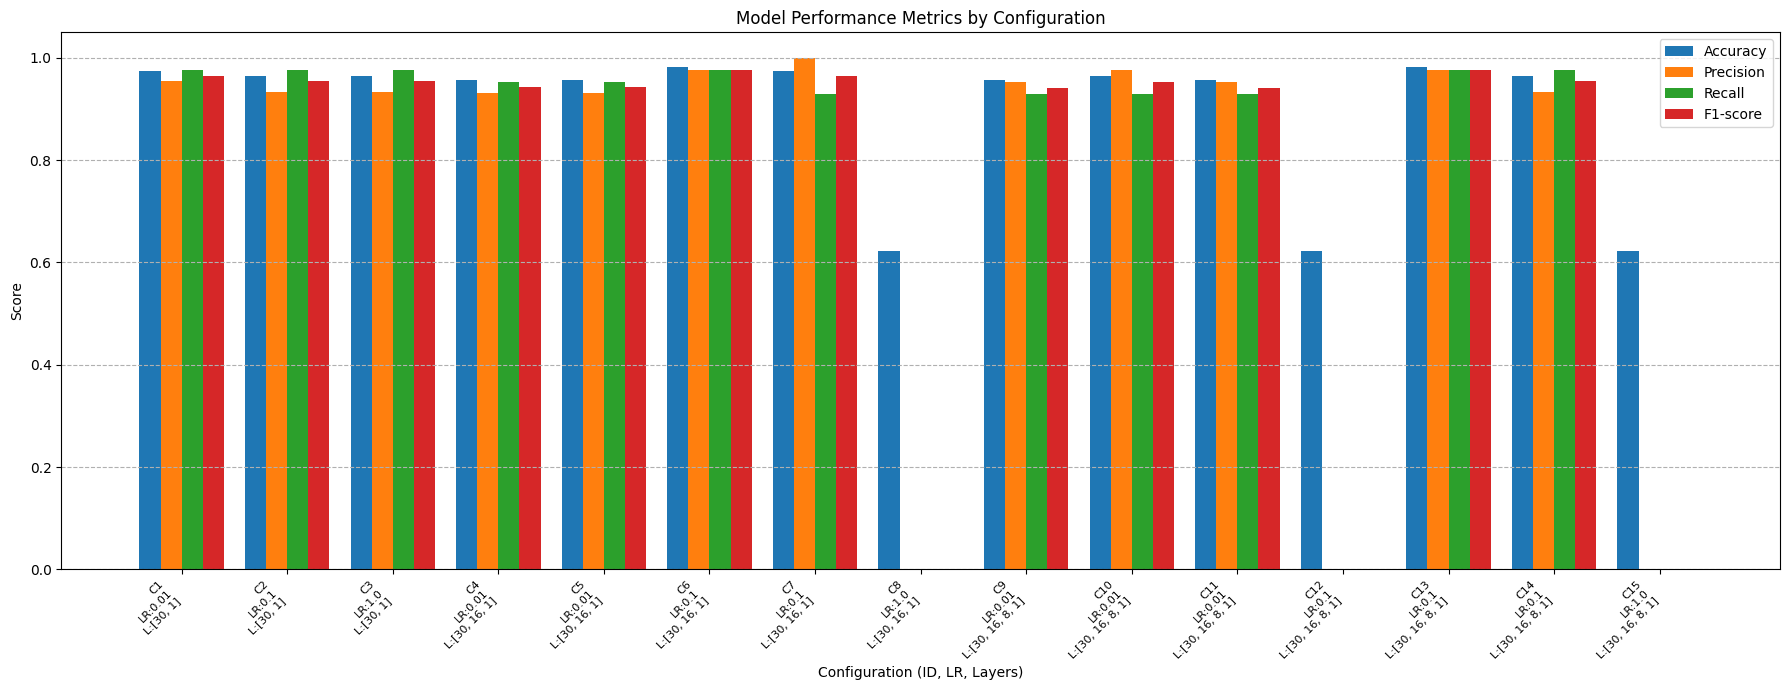

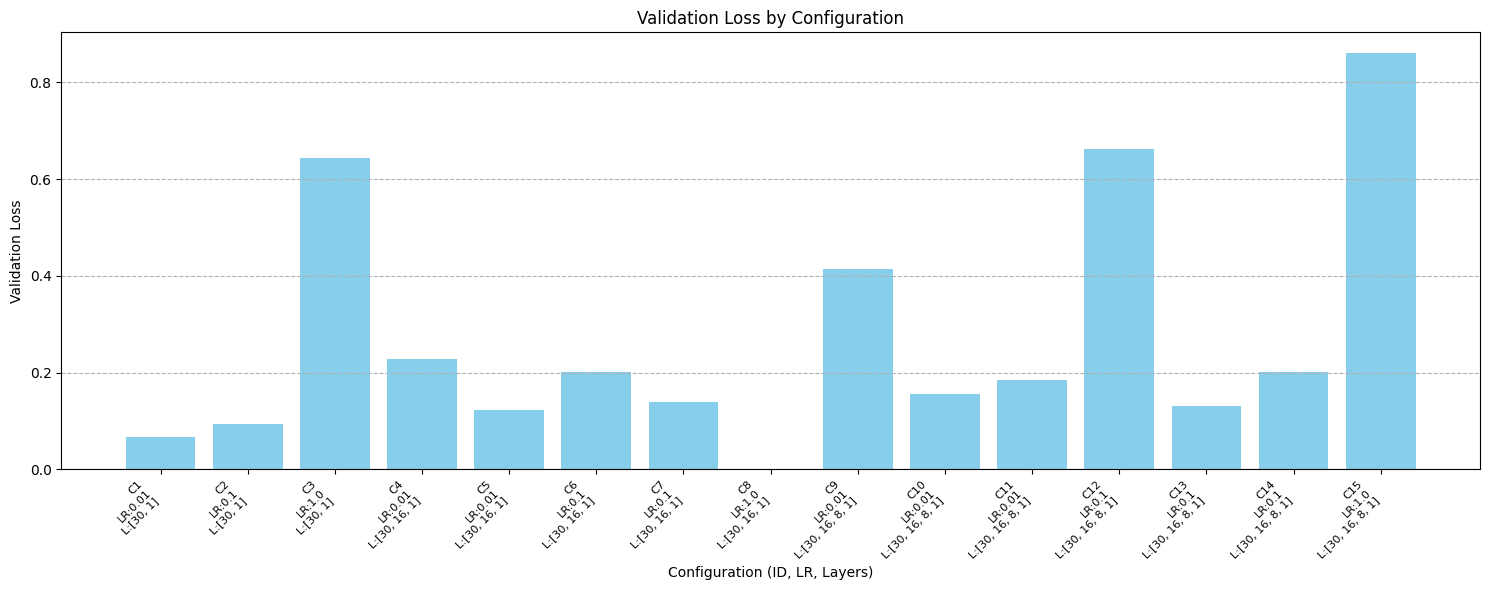

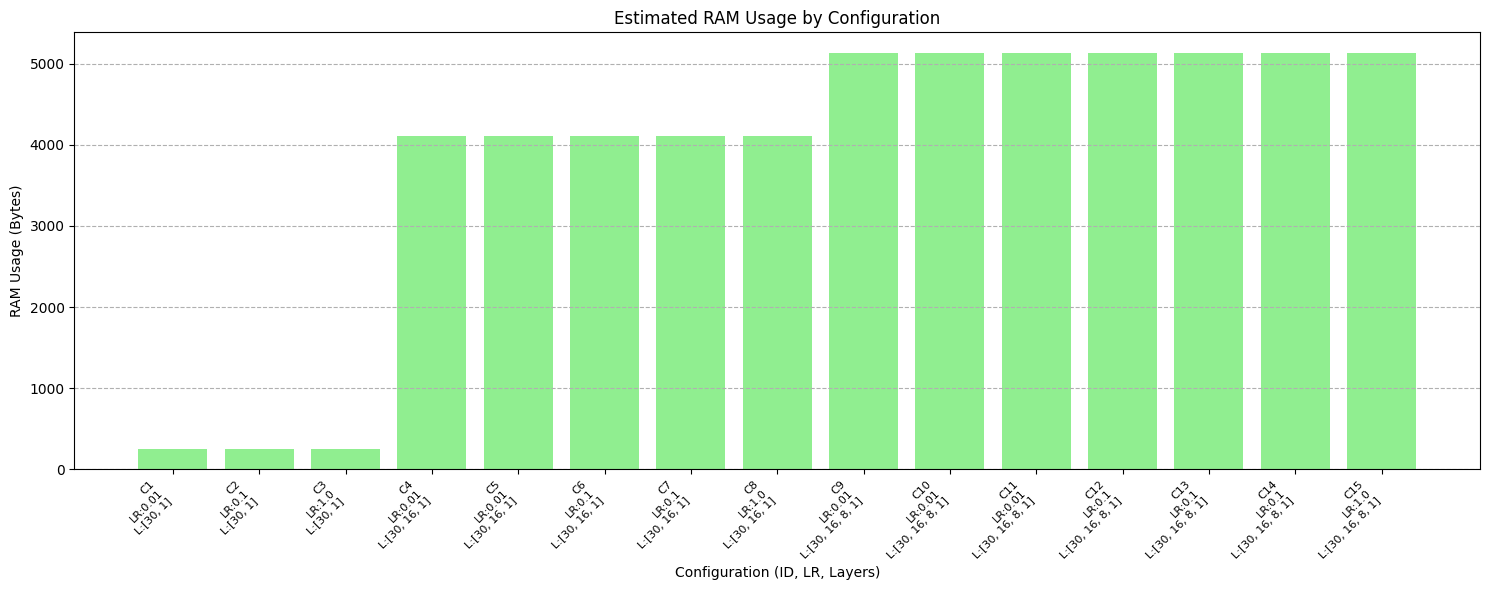

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Use your own DataFrame
results_df = df_results.copy()

# Add configuration labels for X-axis
results_df['config_label'] = results_df.apply(
    lambda row: f"C{row['config_id']}\nLR:{row['learning_rate']}\nL:{row['layers']}", axis=1
)

x_labels = results_df['config_label']
x_pos = np.arange(len(x_labels))

# --- Plot 1: Performance Metrics (Accuracy, Precision, Recall, F1-score) ---
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

num_metrics = len(metrics_to_plot)
bar_width = 0.8 / num_metrics

plt.figure(figsize=(18, 7))

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x_pos + i * bar_width - (bar_width * (num_metrics - 1) / 2),
            results_df[metric],
            width=bar_width,
            label=metric_names[i])

plt.xlabel("Configuration (ID, LR, Layers)")
plt.ylabel("Score")
plt.title("Model Performance Metrics by Configuration")
plt.xticks(x_pos, x_labels, rotation=45, ha="right", fontsize=8)
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# --- Plot 2: Validation Loss ---
plt.figure(figsize=(15, 6))
plt.bar(x_labels, results_df['val_loss'], color='skyblue')
plt.xlabel("Configuration (ID, LR, Layers)")
plt.ylabel("Validation Loss")
plt.title("Validation Loss by Configuration")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# --- Plot 3: RAM Usage ---
if 'ram_bytes' in results_df.columns:
    plt.figure(figsize=(15, 6))
    plt.bar(x_labels, results_df['ram_bytes'], color='lightgreen')
    plt.xlabel("Configuration (ID, LR, Layers)")
    plt.ylabel("RAM Usage (Bytes)")
    plt.title("Estimated RAM Usage by Configuration")
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.grid(True, axis='y', linestyle='--')
    plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No 'ram_bytes' column in results — skipping RAM plot.")
